# How many electric vehicles are on the road and how is the current market share?
- Download data from Wikipedia and analyze light-duty plug-in electric vehicles
- https://en.wikipedia.org/wiki/Electric_car_use_by_country

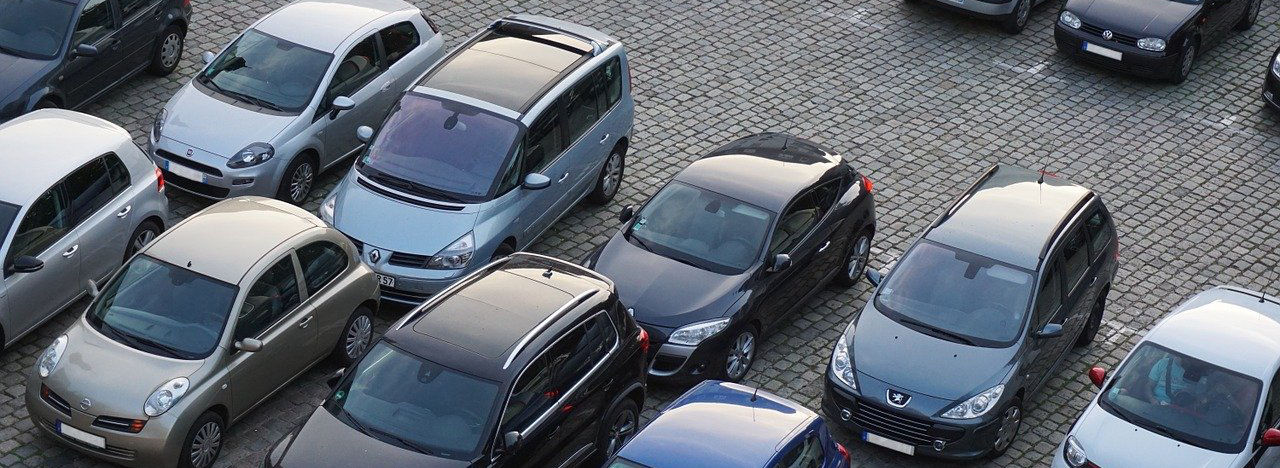

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://en.wikipedia.org/wiki/Electric_car_use_by_country"

# read HTML tables
table = pd.read_html(url)[2]

# drop last two rows
table.drop(table.tail(2).index,inplace=True)

# rename columns
table.rename(columns={"% of carson the road[ii]": "cars on the road (%)",
                      'PEV stock/cumulative sales (2020)[i]':'PEV stock/cumulative sales (2020)'
                     },inplace=True)

# remove citations
table['Country'] = table['Country'].apply( lambda x: x.split('[')[0])

# remove citations
table['Annual sales (2020)'] = table['Annual sales (2020)'].apply( lambda x: x.split('[')[0])
table['Market share (2020)'] = table['Market share (2020)'].apply( lambda x: x.split('%')[0])
table['PEV stock/cumulative sales (2020)'] = table['PEV stock/cumulative sales (2020)'].apply( lambda x: x.split('[')[0])
table['cars on the road (%)'] = table['cars on the road (%)'].fillna('0').apply( lambda x: x.split('%')[0])

# remove additional string elements
table['PEV stock/cumulative sales (2020)'] = table['PEV stock/cumulative sales (2020)'].str.replace('~','')
table['Annual sales (2020)'] = table['Annual sales (2020)'].str.replace(',','')
table['PEV stock/cumulative sales (2020)'] = table['PEV stock/cumulative sales (2020)'].str.replace(',','')

# convert string to float
table['Market share (2020)'] = pd.to_numeric(table['Market share (2020)'])
table['Annual sales (2020)'] = pd.to_numeric(table['Annual sales (2020)'])
table['PEV stock/cumulative sales (2020)'] = pd.to_numeric(table['PEV stock/cumulative sales (2020)'])
table['cars on the road (%)'] = pd.to_numeric(table['cars on the road (%)'])

# sort table
table.sort_values(by='cars on the road (%)',axis=0,ascending=False,inplace=True)

table

,Country,Market share (2020),PEV stock/cumulative sales (2020),Annual sales (2020),cars on the road (%)
5,Norway,74.7,480008,113588,17.20
9,Netherlands,24.6,297380,87946,2.20
10,Sweden,32.2,193054,96054,2.00
4,California,8.1,803816,145099,1.93
3,Germany,13.5,700000,394632,1.20
0,China,5.4,4595100,1246000,0.94
7,UK,10.7,434282,175082,0.70
6,France,11.2,470295,194881,0.60
2,USA,2.1,1741566,297939,0.45
1,Europe,12.3,3299823,1364813,0.40


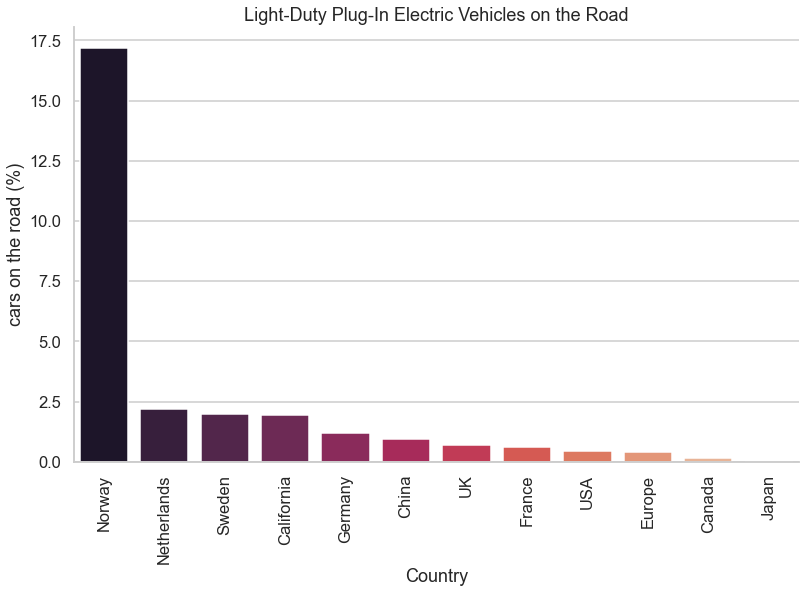

In [78]:
sns.set(context='talk',
        style='whitegrid'
       )

fig = plt.figure(figsize=(13,8))

sns.barplot(x=table['Country'], y=table['cars on the road (%)'], palette="rocket")

plt.xticks(rotation=90)
plt.title('Light-Duty Plug-In Electric Vehicles on the Road')

sns.despine()

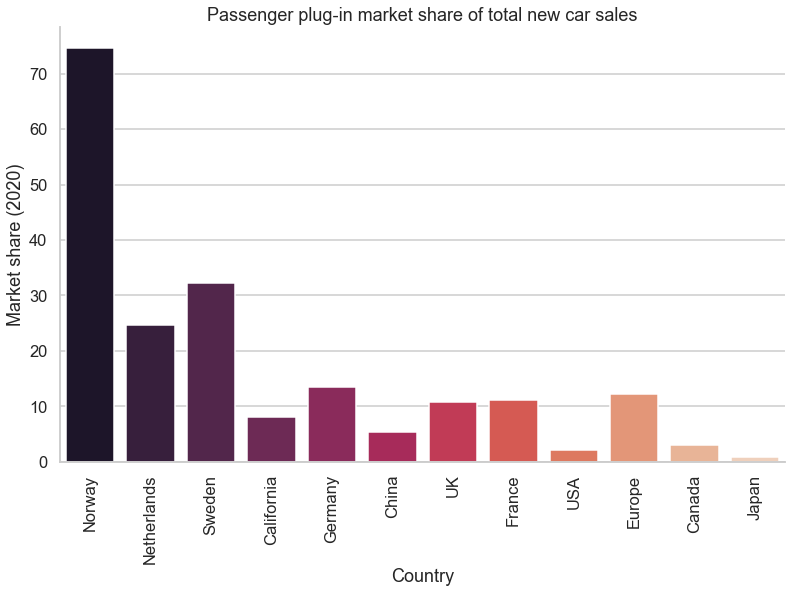

In [77]:
sns.set(context='talk',
        style='whitegrid'
       )

fig = plt.figure(figsize=(13,8))

sns.barplot(x=table['Country'], y=table['Market share (2020)'], palette="rocket")

plt.xticks(rotation=90)
plt.title('Passenger plug-in market share of total new car sales')

sns.despine()